# COVID-19 ANALYSIS

## Background

 As a result of the COVID-19 pandemic, the world is panicking and as a result in complete lockdown. The damage caused by this pandemic is huge and unprecedented, hence it it important to understand the pandemic. Understanding Covid19 starts by gathering and analysing data about the pandemic. This will enable us make better and more informed decisions on how best to approach this global problem. <br>
 The importance of collecting, analysing and understanding the dataregarding this virus and pandemic cannot be over emphasized as it plays a critical role in policy and decision making.

## AIMS AND  OBJECTIVES

The aim of this project is to provide an indepth analysis of the COVID19 data. In order to acchieve the aims set for this project, the following objectives have been put in place: <br>
 -    __Data analysis__ - The COVID-19 dataset should be thoroughly analysed to enable easy understanding.<br>
 -   __Feature engineering__ - This include creating new features and removing irrelevant features from the   dataset. <br>
 -   __Visualization__ - This process involves creating charts to visualize the findings made. This is especially important as it tells the story tha the data holds.


## Questions

- Identify countries that are hot spots/ high risk 
- Countries that are not highly impacted  
- Check for the correlation between countries with high Gini index and the number of cases  
- Case trends per country, can either be monthly or daily  
- Countries that are contributing more to the increase in cases  
- Countries that are highly impact i.e cases vs. the population of the country

In [11]:
%matplotlib inline
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['savefig.dpi'] = 144

In [2]:
filename = "COVID-19-geographic-disbtribution-worldwide.xlsx"

with open(filename, 'rb') as f:
    df = pd.read_excel(f, sheet_name='COVID-19-geographic-disbtributi', parse_dates=['dateRep'])
df.head()

,dateRep,day,Month,year,cases,deaths,Country,geoId,countryterritoryCode,popData2018,continentExp,Actual Pop.,Gini Coef.
0,2020-06-10,10,June,2020,542,15,Afghanistan,AF,AFG,37172386000,Asia,3.326336e+10,0
1,2020-06-09,9,June,2020,575,12,Afghanistan,AF,AFG,37172386000,Asia,3.326336e+10,0
2,2020-06-08,8,June,2020,791,30,Afghanistan,AF,AFG,37172386000,Asia,3.326336e+10,0
3,2020-06-07,7,June,2020,582,18,Afghanistan,AF,AFG,37172386000,Asia,3.326336e+10,0
4,2020-06-06,6,June,2020,915,9,Afghanistan,AF,AFG,37172386000,Asia,3.326336e+10,0


In [3]:
df.describe()

,day,year,cases,deaths,popData2018,Actual Pop.,Gini Coef.
count,22592.000000,22592.000000,22592.000000,22592.000000,2.259200e+04,2.259200e+04,22592.000000
mean,15.542316,2019.997034,319.159968,18.200912,4.781823e+10,4.140492e+10,15.334056
std,9.037950,0.054378,1851.847371,122.452292,1.681587e+11,1.611443e+11,19.214650
min,1.000000,2019.000000,-2461.000000,-1918.000000,0.000000e+00,0.000000e+00,0.000000
25%,7.000000,2020.000000,0.000000,0.000000,1.926542e+09,5.568699e+08,0.000000
50%,15.000000,2020.000000,3.000000,0.000000,8.883800e+09,6.298189e+09,0.000000
75%,24.000000,2020.000000,54.000000,1.000000,3.152858e+10,2.638283e+10,34.000000
max,31.000000,2020.000000,48529.000000,4928.000000,1.392730e+12,1.364799e+12,61.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22592 entries, 0 to 22591
Data columns (total 13 columns):
dateRep                 22592 non-null datetime64[ns]
day                     22592 non-null int64
Month                   22592 non-null object
year                    22592 non-null int64
cases                   22592 non-null int64
deaths                  22592 non-null int64
Country                 22592 non-null object
geoId                   22504 non-null object
countryterritoryCode    22268 non-null object
popData2018             22592 non-null int64
continentExp            22592 non-null object
Actual Pop.             22592 non-null float64
Gini Coef.              22592 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [6]:
df.isna().sum()

dateRep                   0
day                       0
Month                     0
year                      0
cases                     0
deaths                    0
Country                   0
geoId                    88
countryterritoryCode    324
popData2018               0
continentExp              0
Actual Pop.               0
Gini Coef.                0
dtype: int64

In [8]:
df = df.dropna(axis=1)

## Countries affected 

In [75]:
len(country_group)

210

In [81]:
country_group = df.groupby('Country ')
country_group = country_group['cases', 'deaths', 'Gini Coef.', 'popData2018'].agg([np.mean, np.sum, np.min, np.max])
# country_group.sort_values(by='cases', ascending=False, inplace=True)
# country_group = country_group.drop(['day', 'index', 'year', 'popData2018', 'Actual Pop.'], axis=1)
country_group = country_group[country_group.popData2018['mean'] != 0]
country_group.head()

cases                      deaths                Gini Coef.  \
                   mean    sum amin  amax      mean  sum amin amax       mean   
Country                                                                         
Afghanistan  140.254902  21459    0  1063  2.509804  384    0   32          0   
Albania       13.819149   1299    0    36  0.361702   34    0    3         30   
Algeria       65.708861  10382    0   205  4.582278  724    0   42          0   
Andorra        9.573034    852    0    79  0.573034   51    0    4          0   
Angola         1.185185     96    0     9  0.049383    4    0    2         52   

                             popData2018                              \
              sum amin amax         mean            sum         amin   
Country                                                                
Afghanistan     0    0    0  37172386000  5687375058000  37172386000   
Albania      2820   30   30   2866376000   269439344000   2866376000   
Algeria         0    0    0  42228429000  6672091782000  42228429000   
Andorra         0    0    0     77006000     6853534000     77006000   
Angola       4212   52   52  30809762000  2495590722000  30809762000   

                          
                    amax  
Country                   
Afghanistan  37172386000  
Albania       2866376000  
Algeria      42228429000  
Andorra         77006000  
Angola       30809762000

In [29]:
countries_by_case = country_group.sort_values(by=('cases', 'sum'), ascending=False)
countries_by_death = country_group.sort_values(by=('deaths', 'sum'), ascending=False)

### Most affected countries in terms of confirmed cases

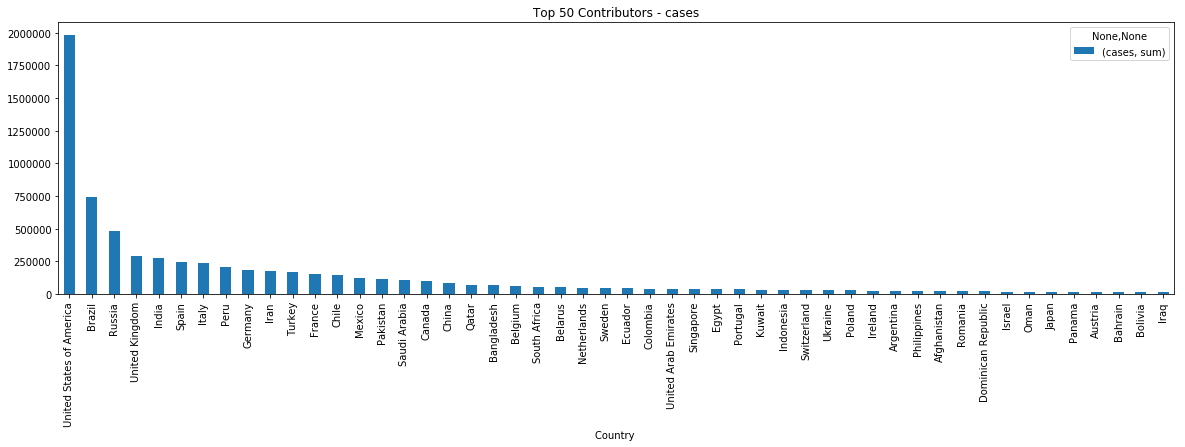

In [30]:
countries_by_case[:50].plot(kind='bar', y=('cases', 'sum'), figsize=(20,5), title='Top 50 Contributors - cases')

### Least affected countries in terms of confirmed cases

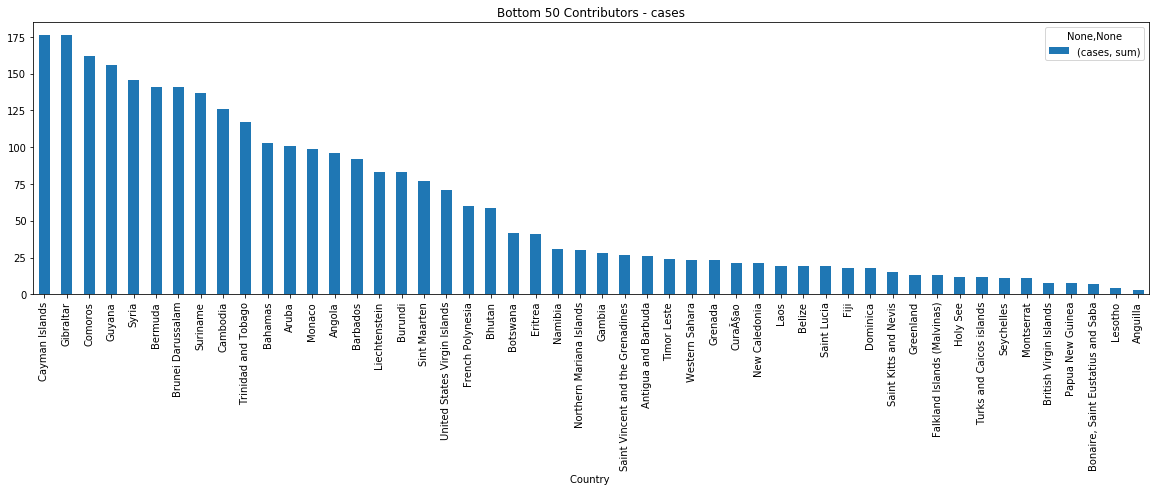

In [24]:
countries_by_case[-50:].plot(kind='bar', y=('cases', 'sum'), figsize=(20,5), title='Bottom 50 Contributors - cases')

### Most affected countries by deaths recorded

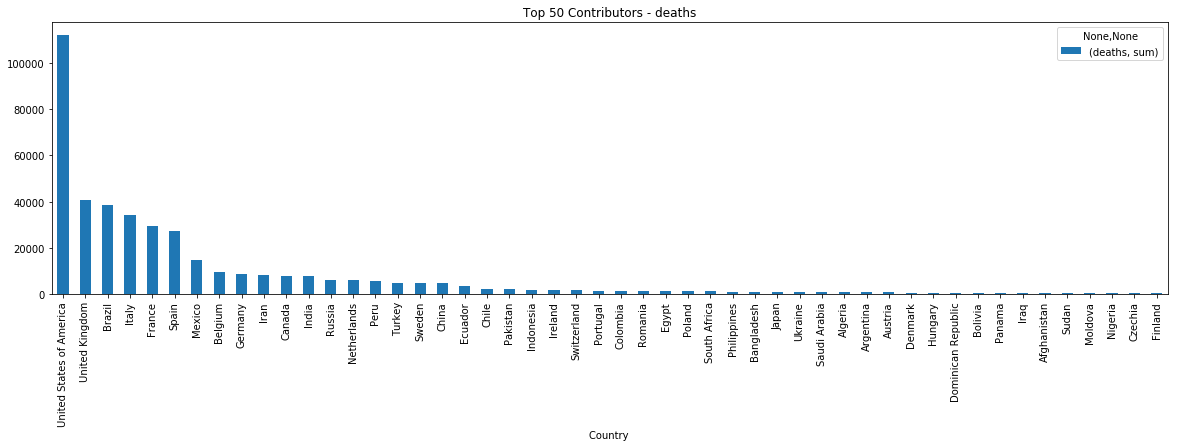

In [31]:
countries_by_death[:50].plot(kind='bar', y=('deaths', 'sum'), figsize=(20,5), title='Top 50 Contributors - deaths')

### Least affected countries by deaths recorded

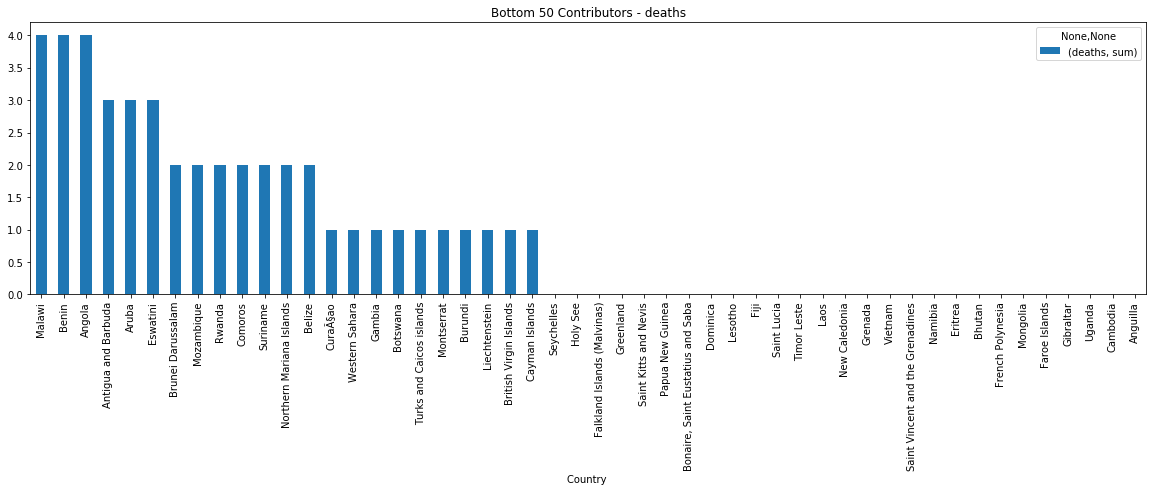

In [32]:
countries_by_death[-50:].plot(kind='bar', y=('deaths', 'sum'), figsize=(20,5), title='Bottom 50 Contributors - deaths')

### Cases by day of the week

In [33]:
df['day_of_week'] = df['dateRep'].dt.weekday_name

df.sort_values(by='dateRep', ascending=True, inplace=True)
df.head()

,dateRep,day,Month,year,cases,deaths,Country,popData2018,continentExp,Actual Pop.,Gini Coef.,day_of_week
8027,2019-12-31,31,December,2019,0,0,Georgia,3731000000,Europe,3.735158e+09,39,Tuesday
10031,2019-12-31,31,December,2019,0,0,Indonesia,267663435000,Asia,2.549539e+11,41,Tuesday
1389,2019-12-31,31,December,2019,0,0,Austria,8847037000,Europe,8.580963e+09,23,Tuesday
152,2019-12-31,31,December,2019,0,0,Afghanistan,37172386000,Asia,3.326336e+10,0,Tuesday
3104,2019-12-31,31,December,2019,0,0,Brazil,209469333000,America,2.026948e+11,59,Tuesday


day_of_week
Friday       336.107683
Monday       299.448765
Saturday     340.765864
Sunday       338.542520
Thursday     316.470382
Tuesday      288.005164
Wednesday    315.993379
Name: cases, dtype: float64


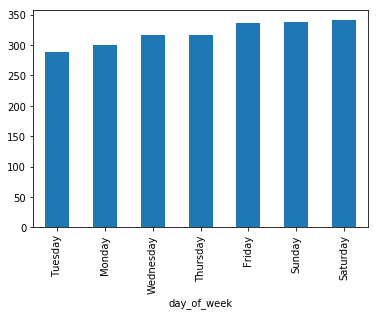

In [34]:
day_df = df.groupby('day_of_week')

day_df['cases'].agg(np.mean).sort_values().plot(kind='bar')
print(day_df['cases'].agg(np.mean))

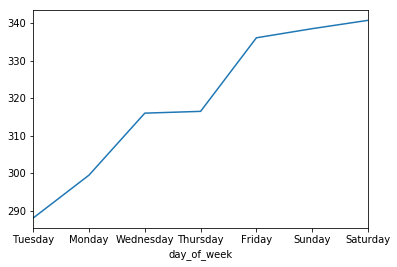

In [35]:
day_df['cases'].agg(np.mean).sort_values().plot(kind='line')

### Countries with high Gini Coef.

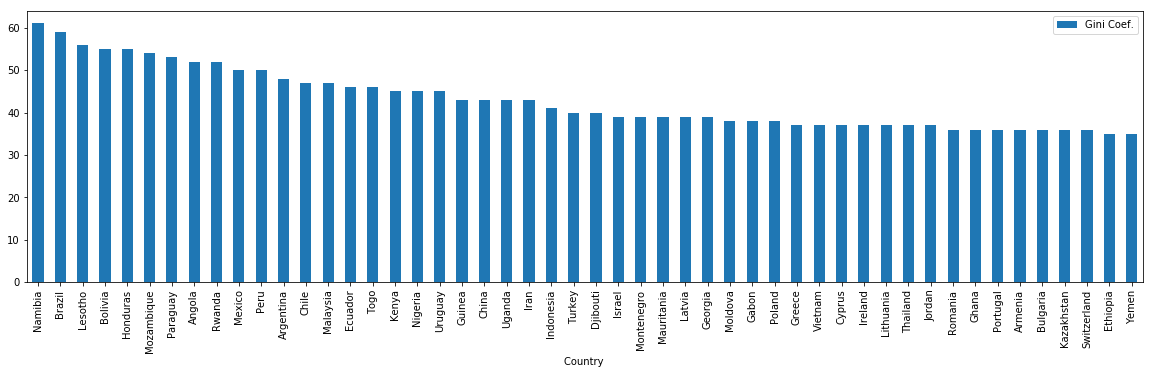

In [36]:
top_gini = df.sort_values(by='Gini Coef.', ascending=False)

countryy_gini = top_gini.groupby('Country ').mean().reset_index().sort_values(by='Gini Coef.', ascending=False)
countryy_gini.head()
countryy_gini[:50].plot(kind='bar',x='Country ', y='Gini Coef.', figsize=(20, 5))

In [72]:
country_group.loc[country_group.popData2018['mean'] == country_group.popData2018['mean'].max()]

cases                        deaths                   \
                mean    sum amin   amax       mean   sum amin  amax   
Country                                                               
China     516.552147  84198    0  15141  28.453988  4638    0  1290   

         Gini Coef.                    popData2018                   \
               mean   sum amin amax           mean              sum   
Country                                                               
China            43  7009   43   43  1392730000000  227014990000000   

                                        
                   amin           amax  
Country                                 
China     1392730000000  1392730000000

In [84]:
country_group['cases_per_pop.'] = (country_group.cases['sum']/country_group.popData2018['mean'])*100

### Top countries by percentage of population infected

In [87]:
country_group.sort_values(by='cases_per_pop.', ascending=False)[:50]

cases                 \
                                                    mean      sum  amin   
Country                                                                   
Cases on an international conveyance Japan     10.875000      696    -9   
Qatar                                         452.069182    71879     0   
San Marino                                      4.246914      688    -9   
Holy See                                        0.136364       12     0   
Andorra                                         9.573034      852     0   
Bahrain                                       100.000000    16200     0   
Kuwait                                        207.125000    33140     0   
Chile                                        1456.724490   142759     1   
Singapore                                     236.282209    38514     0   
Luxembourg                                     25.935897     4046     0   
Peru                                         2144.589474   203736     0   
United States of America                    12146.319018  1979850     0   
Belarus                                       324.290323    50265     0   
Gibraltar                                       2.120482      176     0   
Belgium                                       364.644172    59437     0   
Ireland                                       156.614907    25215     0   
Spain                                        1493.617284   241966  -713   
Iceland                                        11.085890     1807     0   
Armenia                                        88.798701    13675     0   
Djibouti                                       51.559524     4331     0   
Sweden                                        281.742331    45924     0   
United Kingdom                               1773.865031   289140  -525   
United Arab Emirates                          254.165605    39904     0   
Panama                                        185.301075    17233     0   
Guernsey                                        3.036145      252     0   
Isle of Man                                     4.097561      336     0   
Italy                                        1445.159509   235561     0   
Faroe Islands                                   2.253012      187     0   
Oman                                          115.910828    18198     0   
Maldives                                       20.881720     1942     0   
Switzerland                                   189.601227    30905     0   
Brazil                                       4536.828221   739503     0   
Portugal                                      353.060000    35306  -161   
Russia                                       2977.012270   485253     0   
Saudi Arabia                                 1119.288660   108571     0   
Jersey                                          3.771084      313     0   
Moldova                                       107.795699    10025     1   
Netherlands                                   293.883436    47903     0   
Cayman Islands                                  2.120482      176     0   
Canada                                        592.895706    96642     0   
Ecuador                                       277.955696    43917 -2461   
Monaco                                          0.655629       99     0   
Sao Tome and Principe                           8.158730      514     0   
France                                        948.411043   154591  -766   
Germany                                      1134.116564   184861     0   
Bermuda                                         1.698795      141     0   
Liechtenstein                                   0.902174       83     0   
Iran                                         1079.306748   175927     0   
Turkey                                       1933.865169   172114     1   
Denmark                                        73.625767    12001     0   

                                                       deaths              

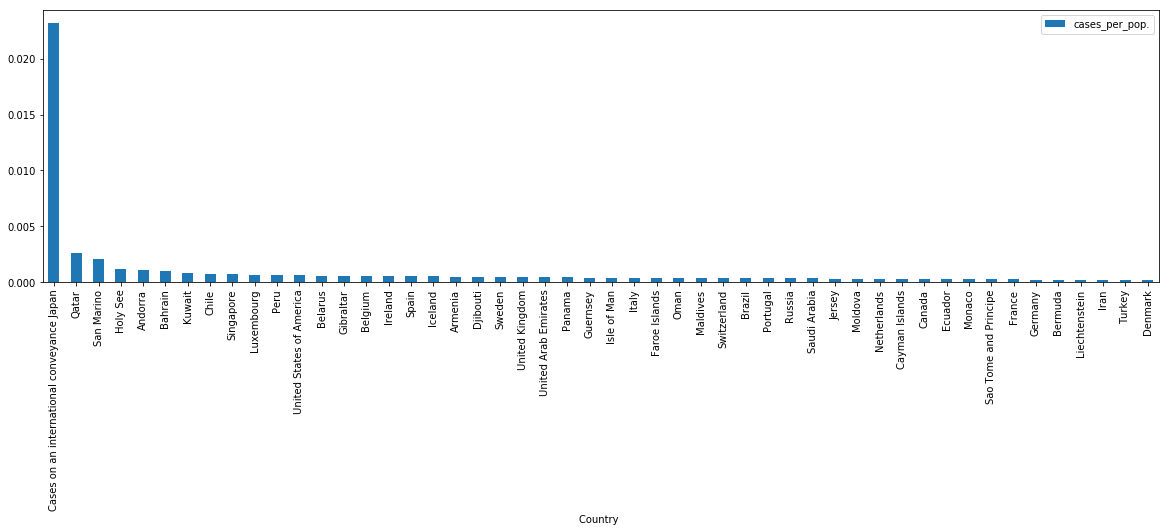

In [88]:
country_group.sort_values(by='cases_per_pop.', ascending=False)[:50].plot(kind='bar', y='cases_per_pop.', figsize=(20,5))

Questions to Ask Yourself When Conducting a Code Review

First, let's look over some of the questions we may ask ourselves while reviewing code. These are simply from the concepts we've covered in these last two lessons!

    Is the code clean and modular?

        Can I understand the code easily?
        Does it use meaningful names and whitespace?
        Is there duplicated code?
        Can you provide another layer of abstraction?
        Is each function and module necessary?
        Is each function or module too long?

    Is the code efficient?

        Are there loops or other steps we can vectorize?
        Can we use better data structures to optimize any steps?
        Can we shorten the number of calculations needed for any steps?
        Can we use generators or multiprocessing to optimize any steps?

    Is documentation effective?

        Are in-line comments concise and meaningful?
        Is there complex code that's missing documentation?
        Do function use effective docstrings?
        Is the necessary project documentation provided?

    Is the code well tested?

        Does the code high test coverage?
        Do tests check for interesting cases?
        Are the tests readable?
        Can the tests be made more efficient?

    Is the logging effective?

        Are log messages clear, concise, and professional?
        Do they include all relevant and useful information?
        Do they use the appropriate logging level?

